### Podatkovno rudarjenje, 1. domača naloga, 15. 3. 2019

# Priprava podatkov, osnovne statistike in vizualizacija

**Mitja Hrovatič**

Neizogiben del vsakega projekta na področju podatkovnega rudarjenja je iskanje,
urejanje in priprava podatkov. V tej nalogi boste spoznali primer podatkovne
zbirke in uporabili postopke za pretvorbo podatkov v ustrezno obliko ter pregled in prikaz
osnovnih statistik.

### Oddaja
Zapišite kodo in odgovore v spodnje celice. Tako pripravljen notebook shranite v vaš repozitorij za domače naloge na *github*. V učilnici oddajte le povezavo do notebooka v vašem repozitoriju, n.pr.: 
https://github.com/PR-ULFRI/dn19-1-vašeuporabniškoime/n1_priprava_pregled.ipynb.

Za bolj podrobna navodila, glejte razdelek "Domače naloge" v [spletni učilnici predmeta](https://ucilnica.fri.uni-lj.si/course/view.php?id=37).

## Podatki

V nalogi boste pregledali in pripravili podatke gledanosti Hollywoodskih filmov
zbirke [MovieLens](https://grouplens.org/datasets/movielens/) v obdobju **1995-2016**. Podatki so v mapi `/podatki/ml-latest-small`.

Iste podatke boste uporabili v vseh domačih nalogah, zato jih dodobra spoznajte. Gre za podatkovno zbirko za
vrednotenje priporočilnih sistemov, ki vsebuje gledalce ter njihove ocene za posamezni film na lestvici 1 do 5.  
Poleg osnovne matrike uporabnikov in ocen vsebuje še dodatne podatke o filmih (npr. žanr, datum, oznake,
igralci).

Podatkovna zbirka vsebuje naslednje datoteke:

* ratings.csv: podatki o uporabnikih in ocenah,
* movies.csv: podatki o žanrih filmov,
* cast.csv: podatki o igralcih,
* tags.csv: podatki o oznakah (ang. \emph{tags}),
* links.csv: povezave na sorodne podatkovne zbirke.


Pred pričetkom reševanja naloge si dobro oglejte podatke in datoteko **README.txt**. Podrobnosti o zbirki lahko preberete na [spletni strani](http://files.grouplens.org/datasets/movielens/ml-latest-small-README.html).

Pripravite metode za nalaganje podatkov v ustrezne podatkovne strukture. Te vam bodo prišle
prav tudi pri nadaljnjih nalogah.
Bodite pozorni na velikost podatkov.

Zapišite kodo za branje datotek in pripravo ustreznih matrik (in drugih struktur) podatkov, ki jih boste uporabi pri odgovarjanju na spodnja vprašanja.

Kodo lahko razdelite v več celic.

In [1]:
from csv import DictReader
from datetime import datetime
import numpy as np
from operator import itemgetter, attrgetter
import itertools

%matplotlib inline
%config InlineBackend.figure_formats = ['jpg']
import matplotlib
matplotlib.figure.Figure.__repr__ = lambda self: (
    f"<{self.__class__.__name__} size {self.bbox.size[0]:g}"
    f"x{self.bbox.size[1]:g} with {len(self.axes)} Axes>")

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
plt.style.use('PR.mplstyle')


# Shranjeni podatki
movies = {}
zanr = {}
cast = {}
ratings_movie = {}
ratings_user = {}
tags = []
links = []
actors = {}

In [2]:
with open('podatki/ml-latest-small/movies.csv', 'rt', encoding='utf-8') as data:
    for row in DictReader(data):
        movies[row['movieId']] = row
        for genre in row['genres'].split('|'):
            if genre not in zanr:
                zanr[genre] = [genre]
            else:
                zanr[genre] += [genre]
        
with open('podatki/ml-latest-small/ratings.csv', 'rt', encoding="utf-8") as data:
    for row in DictReader(data):
        if row['movieId'] not in ratings_movie:
            ratings_movie[row['movieId']] = []
        ratings_movie[row['movieId']].append([float(row['rating']), int(row['timestamp'])])
        
        if row['movieId'] not in ratings_user:
            ratings_user[row['movieId']] = []
        ratings_user[row['movieId']].append([row['userId']])
        
    # datetime.fromtimestamp(int(row['timestamp'])).strftime('%Y-%m-%d %H:%M')
        
    for key, value in ratings_movie.items():
        ratings_movie[key] = np.array(value)
    
    for key, value in ratings_user.items():
        ratings_user[key] = np.array(value)
        
    
        
with open('podatki/ml-latest-small/cast.csv', 'rt', encoding="utf-8") as data:
    for row in DictReader(data):
        cast[row['movieId']] = row['cast'].split("|")
        
    for key, value in cast.items():
        for actor in value:
            if actor not in actors:
                actors[actor] = []
            actors[actor] += [key]
        
with open('podatki/ml-latest-small/tags.csv', 'rt', encoding="utf-8") as data:
    for row in DictReader(data):
        tags.append(row)
        
with open('podatki/ml-latest-small/links.csv', 'rt', encoding="utf-8") as data:
    for row in DictReader(data):
        links.append(row)

## Vprašanja

Glavni namen podatkovnega rudarjenja je *odkrivanje znanj iz podatkov*,
torej odgovarjanje na vprašanja z uporabo računskih postopkov.

Z uporabo principov, ki ste jih spoznali na vajah in predavanjih, odgovorite na
spodnja vprašanja. Pri vsakem vprašanju dobro premislite, na kakšen način boste
najbolje podali, prikazali oz. utemeljili odgovor. Bistven del so odgovori na
vprašanja in ne implementacija vaše rešitve.

### 1. vprašanje (15%):
Kateri filmi so v povprečju najbolje ocenjeni?  Pripravite seznam
filmov ter njihovih povprečnih ocen in izpišite po 10 filmov z vrha seznama.
Opazite pri takem ocenjevanju kakšno težavo? Kako bi jo lahko rešili? Kakšni so
rezultati tedaj?

Kodo lahko razdelite v več celic.

In [3]:
best_rating = []

#Izračuano povprečje
for key, value in movies.items():
    if key in ratings_movie:
        best_rating.append([movies[key]['title'], sum(ratings_movie[key][:, 0]) / len(ratings_movie[key][:, 0])])


best_rating = sorted(best_rating, reverse=True, key=itemgetter(1))

for i in range(10):
    film, ocena = best_rating[i]
    print(film, "-->", ocena)
          
print("-----------------------------------------------------------------------------------")
# Izračunano razmerje
best_rating = []

for key, value in movies.items():
    if key in ratings_movie:
        st_ogledov = len(ratings_user[key][:, 0])
        pov_ocena = sum(ratings_movie[key][:, 0]) / len(ratings_movie[key][:, 0])
        ratio = st_ogledov / pov_ocena
        best_rating.append([movies[key]['title'], ratio])

best_rating = sorted(best_rating, reverse=True, key=itemgetter(1)) 
        
for i in range(10):
    film, ocena = best_rating[i]
    print(film, "-->", ocena)

Lamerica (1994) --> 5.0
Mute Witness (1994) --> 5.0
Picture Bride (Bijo photo) (1994) --> 5.0
Red Firecracker, Green Firecracker (Pao Da Shuang Deng) (1994) --> 5.0
Paris, France (1993) --> 5.0
Faces (1968) --> 5.0
Maya Lin: A Strong Clear Vision (1994) --> 5.0
Heavy (1995) --> 5.0
Death in the Garden (Mort en ce jardin, La) (1956) --> 5.0
Day the Sun Turned Cold, The (Tianguo niezi) (1994) --> 5.0
-----------------------------------------------------------------------------------
Forrest Gump (1994) --> 84.10922242314646
Pulp Fiction (1994) --> 76.12472806381436
Jurassic Park (1993) --> 73.93008370260955
Silence of the Lambs, The (1991) --> 73.46263910969793
Shawshank Redemption, The (1994) --> 69.30920816911501
Star Wars: Episode IV - A New Hope (1977) --> 68.93040293040293
Toy Story (1995) --> 63.783585990590694
Independence Day (a.k.a. ID4) (1996) --> 62.57274522712311
Matrix, The (1999) --> 61.91139824642362
Ace Ventura: Pet Detective (1994) --> 60.9452736318408


Odgovor: 

Rezultati, ki upoštevajo samo povprečno oceno:

Lamerica (1994) --> 5.0
Mute Witness (1994) --> 5.0
Picture Bride (Bijo photo) (1994) --> 5.0
Red Firecracker, Green Firecracker (Pao Da Shuang Deng) (1994) --> 5.0
Paris, France (1993) --> 5.0
Faces (1968) --> 5.0
Maya Lin: A Strong Clear Vision (1994) --> 5.0
Heavy (1995) --> 5.0
Death in the Garden (Mort en ce jardin, La) (1956) --> 5.0
Day the Sun Turned Cold, The (Tianguo niezi) (1994) --> 5.0




Težava je v tem, da med filmi, ki imajo veliko ogledov in filmi, ki imajo npr. samo en ogled ni razlike in imajo enako povprečno oceno, čeprav se razlikujejo v številu ogledov.

Težavo sem rešil tako, da sem izračunal razmerje (število ogledov / povprečna ocena), ki upošteva tudi število ogledov in je tako, ocena bolj pravična in nam pokaže kateri film je v resnici najboljše ocenjen.




Rezultati z izračunanim razmerjem (število ogledov / povprečna ocena):

Forrest Gump (1994) --> 84.10922242314646
Pulp Fiction (1994) --> 76.12472806381436
Jurassic Park (1993) --> 73.93008370260955
Silence of the Lambs, The (1991) --> 73.46263910969793
Shawshank Redemption, The (1994) --> 69.30920816911501
Star Wars: Episode IV - A New Hope (1977) --> 68.93040293040293
Toy Story (1995) --> 63.783585990590694
Independence Day (a.k.a. ID4) (1996) --> 62.57274522712311
Matrix, The (1999) --> 61.91139824642362
Ace Ventura: Pet Detective (1994) --> 60.9452736318408


### 2. vprašanje (15%):
Posamezni film pripada enemu ali več žanrom. 
Koliko je vseh žanrov? Prikaži porazdelitev žanrov z uporabo ustrezne
vizualizacije.

Kodo lahko razdelite v več celic.

Število žanrov 20


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text xticklabel objects>)

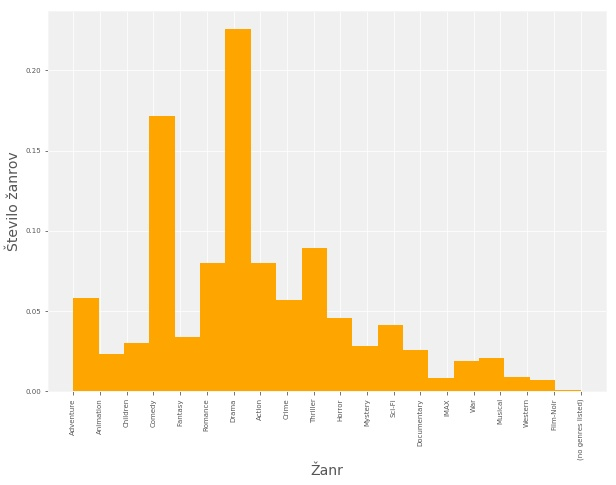

In [4]:
# Število žanrov

print("Število žanrov", len(zanr))


# porazdelitev žanrov
data_of_genre = list(itertools.chain.from_iterable(zanr.values()))

plt.figure(figsize=(10,7))
plt.hist(data_of_genre, density=True, bins=20, color='orange')
plt.xlabel('Žanr', fontsize=14)
plt.ylabel('Število žanrov', fontsize=14);
plt.xticks(rotation='vertical')

Odgovor: Žanrov je 20.

### 3. vprašanje (20%):
Število ocen (ogledov) se za posamezni film razlikuje. Ali
obstaja povezava med gledanostjo in povprečno oceno filma? Opišite postopek, ki
ste ga uporabili pri odgovarjanju na vprašanje.

Kodo lahko razdelite v več celic.

Text(0, 0.5, 'Število ogledov filma')

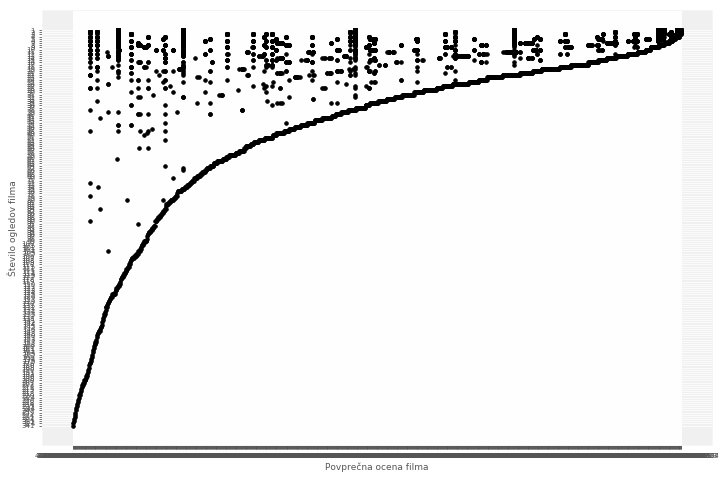

In [5]:
# Gledanost / povpračna ocena

ogledi_pov_ocena = []

for key, value in movies.items():
    if key in ratings_movie:
        st_ogledov = len(ratings_user[key][:, 0])
        pov_ocena = sum(ratings_movie[key][:, 0]) / len(ratings_movie[key][:, 0])
        ogledi_pov_ocena.append([st_ogledov, pov_ocena, st_ogledov / pov_ocena, movies[key]['title']])
#         print("Naslov filma:", movies[key]['title'], 
#               "\nŠtevilo ocen (gledanost):", st_ogledov, 
#               "\nPovprečna ocena filma:", pov_ocena, 
#               "\nRatio (stevilo ogledov / povprecna ocena)", len(ratings_user[key][:, 0]) / 
#                                                           (sum(ratings_movie[key][:, 0]) / len(ratings_movie[key][:, 0])), 
#               "\n---------------------------------------------------------------------------------------------------------")

        
ogledi_pov_ocena = np.array(sorted(ogledi_pov_ocena, reverse=True, key=itemgetter(0)))


plt.figure(figsize=(12,8))
st_ocena = ogledi_pov_ocena[:, 0]
ocena = ogledi_pov_ocena[:, 1]
plt.plot(ocena, st_ocena, "k.")
plt.xlabel('Povprečna ocena filma')
plt.ylabel('Število ogledov filma')

Odgovor: Najprej sem za vsak film izračunal število ogledov ter povprečno oceno, nato sem iz tega izračunal razmerje (število ogledov / povprečna ocena), ki nam pove koliko je bil dolečen film zares priljubljen glede na število ogledov in ocene. Lahko vidimo da je malo filmov z veliko gledanostjo ter zelo visoko povprečno oceno.

### 4. vprašanje (30%):
Vsaka ocena je bila vnešena na določen datum (stolpec
*timestamp*).  Ali se popularnost posameznih filmov s časom spreminja?
Problem reši tako, da za dani film ocene razporediš po času ter v vsaku časovni
točki izračunaš povprečje za zadnjih 30, 50, ali 100 ocen. Nariši graf, kako se
ocena spreminja in ga prikaži za dva zanimiva primera filmov.

Kodo lahko razdelite v več celic.

OrderedDict([('movieId', '356'), ('title', 'Forrest Gump (1994)'), ('genres', 'Comedy|Drama|Romance|War')])


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], <a list of 11 Text xticklabel objects>)

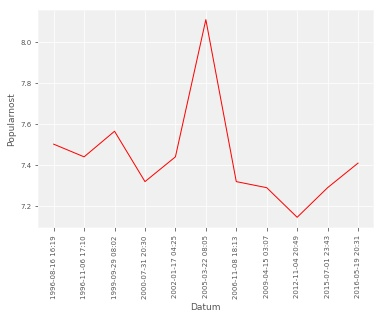

In [6]:
popularnost_filma = []
datum_popularnosti = []

seznam_sorted = sorted(ratings_movie['356'], key=itemgetter(1))

stevilo_izbranih_filmov_za_izracun = 30

print(movies['356'])

for key, seznam in enumerate(seznam_sorted):
    rate, time = seznam
    if key != 0 and key % stevilo_izbranih_filmov_za_izracun != 0:
        continue
    
    seznam_num = np.array(seznam_sorted)
    
    if len(seznam_num[key-stevilo_izbranih_filmov_za_izracun:key, 0]) != 0:
        st_ogledov = len(seznam_num[key-stevilo_izbranih_filmov_za_izracun:key, 0])
        pov_ocena = sum(seznam_num[key-stevilo_izbranih_filmov_za_izracun:key, 0]) /\
                    len(seznam_num[key-stevilo_izbranih_filmov_za_izracun:key, 0])
        ratio = st_ogledov / pov_ocena
    
        popularnost_filma.append(ratio)
        datum_popularnosti.append(datetime.fromtimestamp(time).strftime('%Y-%m-%d %H:%M'))

    
plt.figure()
plt.plot(datum_popularnosti, popularnost_filma, 'r')
plt.xlabel('Datum')
plt.ylabel('Popularnost')
plt.xticks(rotation='vertical')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

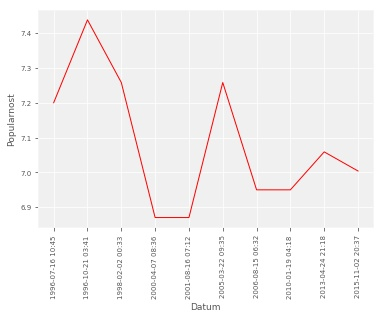

In [7]:
popularnost_filma = []
datum_popularnosti = []

seznam_sorted2 = sorted(ratings_movie['296'], key=itemgetter(1))


stevilo_izbranih_filmov_za_izracun = 30

for key, seznam in enumerate(seznam_sorted2):
    rate, time = seznam
    if key != 0 and key % stevilo_izbranih_filmov_za_izracun != 0:
        continue
    
    seznam_num = np.array(seznam_sorted2)
    
    if len(seznam_num[key-stevilo_izbranih_filmov_za_izracun:key, 0]) != 0:
        st_ogledov = len(seznam_num[key-stevilo_izbranih_filmov_za_izracun:key, 0])
        pov_ocena = sum(seznam_num[key-stevilo_izbranih_filmov_za_izracun:key, 0]) /\
                    len(seznam_num[key-stevilo_izbranih_filmov_za_izracun:key, 0])
        ratio = st_ogledov / pov_ocena
    
        popularnost_filma.append(ratio)
        datum_popularnosti.append(datetime.fromtimestamp(time).strftime('%Y-%m-%d %H:%M'))

    
plt.figure()
plt.plot(datum_popularnosti, popularnost_filma, 'r')
plt.xlabel('Datum')
plt.ylabel('Popularnost')
plt.xticks(rotation='vertical')

Odgovor: Da, popularnost filmov se skozi čas spreminja. 

### 5. vprašanje (20%):
Kako bi ocenili popularnost posameznih igralcev? Opišite postopek
ocenitve ter izpišite 10 najbolj popularnih igralcev.

Kodo lahko razdelite v več celic.

In [8]:
najbolj_popularni = []


for key, value in actors.items():
    trenutni_igralec = []
    
    for film in value:
        if film in ratings_movie:
            st_ogledov = len(ratings_user[film][:, 0])
            pov_ocena = sum(ratings_movie[film][:, 0]) / len(ratings_movie[film][:, 0])
            ratio = st_ogledov / pov_ocena
            trenutni_igralec.append(ratio)
    
    if len(trenutni_igralec) != 0:
        najbolj_popularni.append([key, sum(trenutni_igralec)])

najbolj_popularni = sorted(najbolj_popularni, reverse=True, key=itemgetter(1))

print("Najbolj popularni igralci:")
for i in range(11):
    igralec, pov_razmerje = najbolj_popularni[i]
    if igralec != "":
        print(igralec, "-->", pov_razmerje)


Najbolj popularni igralci:
Tom Hanks --> 613.4271245016186
Harrison Ford --> 589.7142764336979
Bruce Willis --> 512.3578725068769
Jim Carrey --> 441.3894576071508
Robert De Niro --> 439.1918819863984
Morgan Freeman --> 435.5129212284321
Tom Cruise --> 423.7525137948783
Brad Pitt --> 407.43778945096454
Bill Murray --> 395.83309866898907
Robin Williams --> 370.16601849416145


Odgovor: Najprej sem naredil seznam igralcev ter za vsakega sem izračunal razmerje (gledanost / ocena) in izračunal povprečje vseh razmerij igralca. Seznam sem uredil po velikosti padajoče in igralec z najboljšim povprečnim razmerjem, je tudi najbolj popularen.

### bonus vprašanje (5%):

Kateri je tvoj najljubši film? Zakaj?

Odgovor: **zapišite odgovor**

## Zapiski
Za nalaganje podatkov lahko uporabite vgrajen modul `csv`. Mapa s podatki `ml-latest-small` se v tem primeru mora nahajati v isti mapi kot notebook.

In [9]:
# from csv import DictReader

# reader = DictReader(open('podatki/ml-latest-small/ratings.csv', 'rt', encoding='utf-8'))
# for row in reader:
#     user = row["userId"]
#     movie = row["movieId"]
#     rating = row["rating"]
#     timestamp = row["timestamp"]
#     print(user, movie, rating, timestamp)

Podatki v zadnji vrstici datoteke:

In [10]:
# user, movie, rating, timestamp

Pretvorba časovnega formata (*Unix time*). Kode za oblikovanje so navedene v dokumentaciji modula [`datetime`](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior).

In [11]:
from datetime import datetime

t = 1217897793 # Unix-time
ts = datetime.fromtimestamp(t).strftime('%Y-%m-%d %H:%M')
ts

'2008-08-05 02:56'